In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tools import make_visibilities_from_image, make_power_spectrum
from plotting_func import plot_power_spectrum

from mpol.__init__ import zenodo_record
from mpol import coordinates, gridding, fourier, losses, precomposed, utils
from mpol.images import ImageCube

L
2140 2140


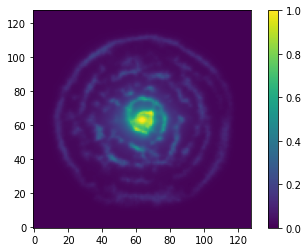

0.3 arcsec
128
0.09 arcsec^2
79.6541464765333 Jy
5.0 Jy
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] Jy
5.0


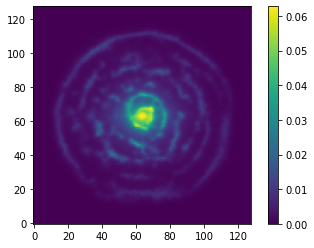

Dataset has 325080 visibilities
[   81.49899897     7.87458415   -52.21522451 ...  2219.99621332
  1180.43683531 -1039.55937801]
[   15.83280024    27.80872902   -44.83083149 ...   774.43215868
  -261.48392316 -1035.91608184]
[0.46612835 0.46612835 0.46612835 ... 0.46612835 0.46612835 0.46612835]
The maximum cell_size that will still Nyquist sample the spatial frequency represented by the maximum u,v value is 0.09 arcseconds


AssertionError: 

In [12]:
# Creating fake visibilities from jpg image

image_file = '../data/star_images/RScl.jpg'
cell_size = 0.3
make_visibilities_from_image(image_file=image_file, cell_size=cell_size)

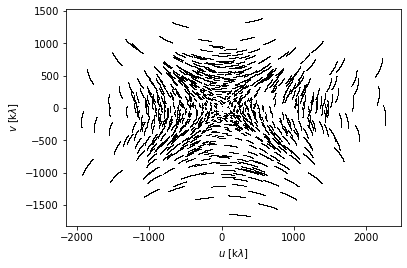

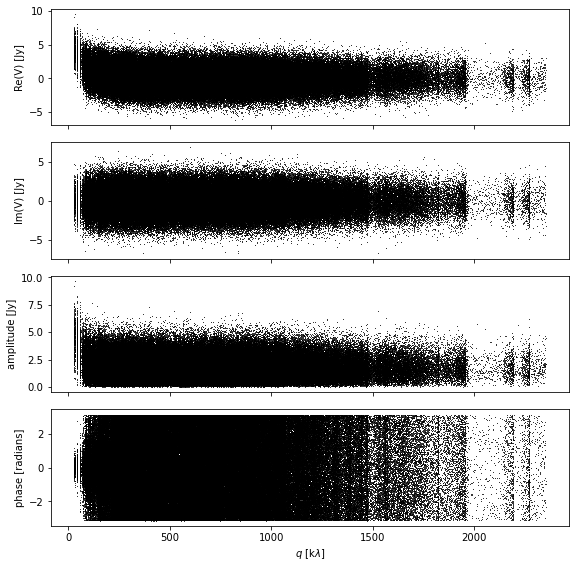

In [3]:
# Use fake visibilities to get dirty image

# load the mock visibilities from the .npz file
d = np.load("../data/visibilities/mock_visibilities_RScl.npz")
#d = np.load("../data/visibilities/mock_visibilities_model_star_new.npz")
uu = d["uu"]
vv = d["vv"]
weight = d["weight"]
data = d["data"]
data_re = np.real(data)
data_im = np.imag(data)

# Plot the downloaded (u,v) distribution
fig, ax = plt.subplots(nrows=1)
ax.scatter(uu, vv, s=1, rasterized=True, linewidths=0.0, c="k")
ax.set_xlabel(r"$u$ [k$\lambda$]")
ax.set_ylabel(r"$v$ [k$\lambda$]")
plt.show()

#calculate the amplitude and phase of the visibilities
amp = np.abs(data)
phase = np.angle(data)

# calculate the uv distance (baseline separations in meters, calculated as sqrt(u*u+v*v))
uvdist = np.hypot(uu, vv)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
pkw = {"s":1, "rasterized":True, "linewidths":0.0, "c":"k"}

ax[0].scatter(uvdist, data.real, **pkw)
ax[0].set_ylabel("Re(V) [Jy]")

ax[1].scatter(uvdist, data.imag, **pkw)
ax[1].set_ylabel("Im(V) [Jy]")

ax[2].scatter(uvdist, amp, **pkw)
ax[2].set_ylabel("amplitude [Jy]")

ax[3].scatter(uvdist, phase, **pkw)
ax[3].set_ylabel("phase [radians]")
ax[3].set_xlabel(r"$q$ [k$\lambda$]")

plt.tight_layout()
plt.show()


(1, 128, 128)
(1, 128, 128)


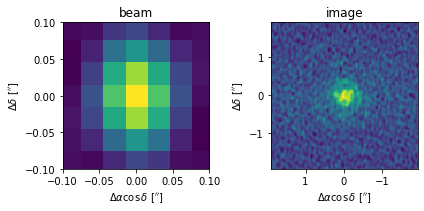

In [4]:
# instantiate the gridcoords object
npix = 128
coords = coordinates.GridCoords(cell_size=cell_size, npix=npix)

# instantiate the dirty imager object
imager = gridding.DirtyImager(
    coords=coords,
    uu=uu,
    vv=vv,
    weight=weight,
    data_re=np.real(data),
    data_im=np.imag(data),
)

# calculate the dirty image and the beam
img, beam = imager.get_dirty_image(weighting="briggs", robust=0.0)

print(beam.shape)
print(img.shape)

# visualise the calculated dirty image and dirty beam
chan = 0
kw = {"origin": "lower", "interpolation": "none", "extent": imager.coords.img_ext}
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
ax[0].imshow(beam[chan], **kw)
ax[0].set_title("beam")
ax[0].set_xlim(-0.1, 0.1)
ax[0].set_ylim(-0.1, 0.1)
ax[1].imshow(img[chan], **kw)
ax[1].set_title("image")
for a in ax:
    a.set_xlabel(r"$\Delta \alpha \cos \delta$ [${}^{\prime\prime}$]")
    a.set_ylabel(r"$\Delta \delta$ [${}^{\prime\prime}$]")
plt.tight_layout()
plt.show()

In [9]:
# Make power spectrum from fake visibilities

visibility_file = '../data/visibilities/mock_visibilities_RScl.npz'
n_bins = 100
power_spectrum_df = make_power_spectrum(visibility_file, n_bins)

power_spectrum_df

Loaded visibilities from ../data/visibilities/mock_visibilities_RScl.npz.
The dataset has 325080 visibilities.

Power spectrum data saved to: RML_loop_outputs/power_spectrum.csv



,uvdist_klambda,scales_arcsec,V_re,V_im,power
0,39.352481,5.241469,3.991791,0.168956,15.962943
1,63.736580,3.236208,2.317922,-0.035028,5.373988
2,86.959530,2.371963,1.510612,0.034904,2.283168
3,110.182481,1.872029,1.044853,-0.040923,1.093392
4,133.405432,1.546150,0.925254,-0.029167,0.856946
...,...,...,...,...,...
95,2246.693940,0.091808,-0.044041,-0.058142,0.005320
96,2269.916890,0.090869,0.017345,-0.176437,0.031431
97,2293.139841,0.089949,-0.392879,-0.143907,0.175063
98,2316.362792,0.089047,0.111746,0.317059,0.113014


In [10]:
plot_power_spectrum('RML_loop_outputs/power_spectrum.csv')

Power spectrum plot saved to: RML_loop_outputs/re_and_im_vis_vs_uvdist.pdf

